In [775]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
pd.__version__

'1.4.4'

In [776]:
df = pd.read_csv("compas.csv")

In [777]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [779]:
df.drop(columns=["violent_recid"], inplace=True)

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [781]:
sns.set(rc={"figure.figsize":(23.7,8.27)})
sns.set_style("whitegrid")

<AxesSubplot:xlabel='sex', ylabel='count'>

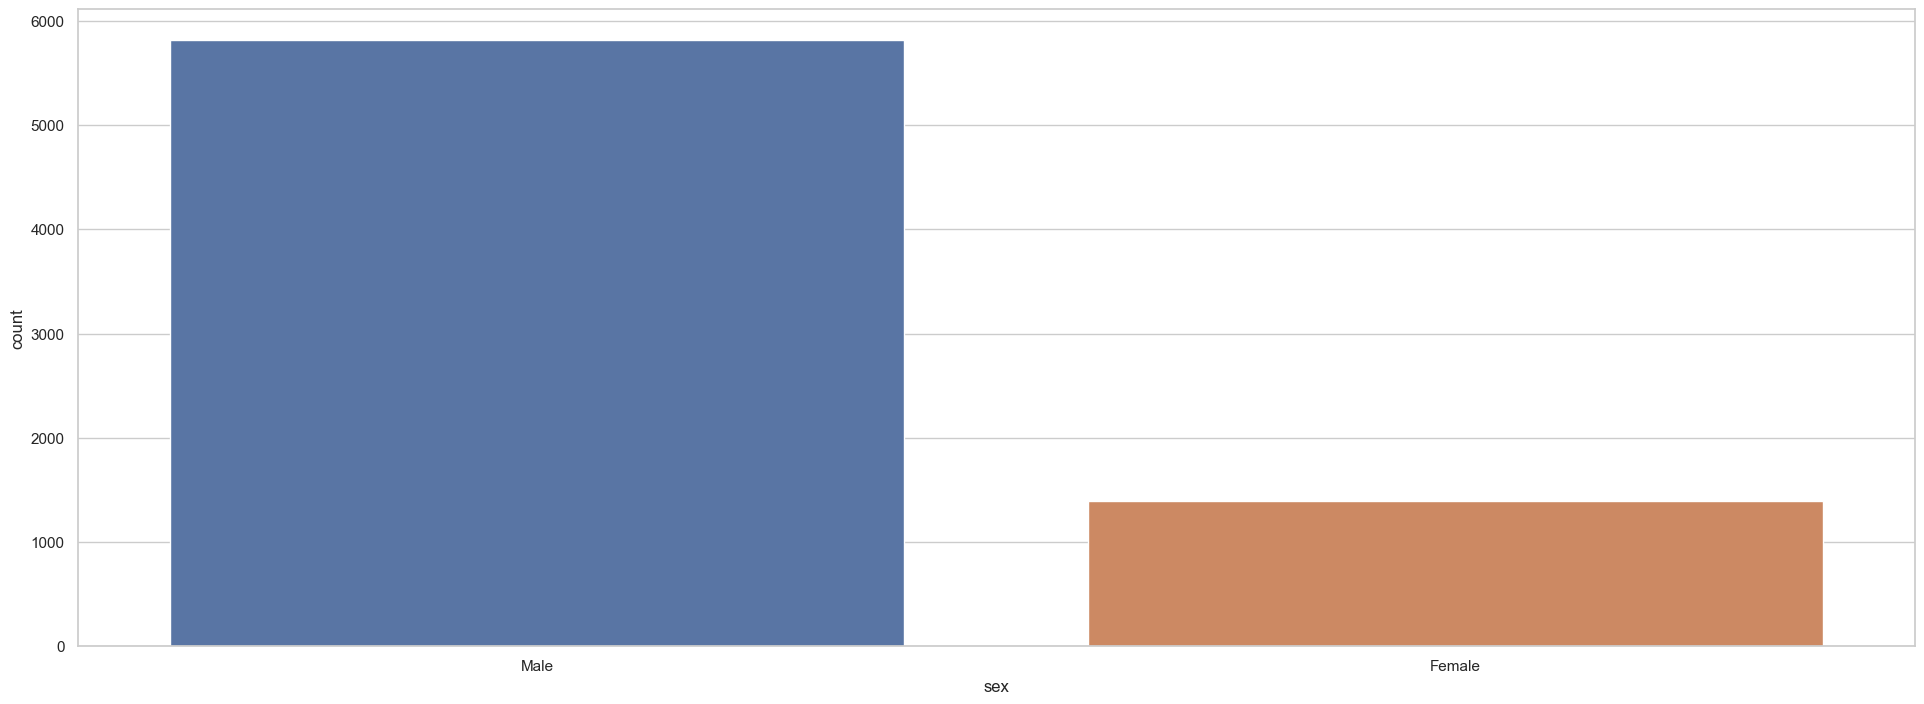

In [782]:
sns.countplot(x=df["sex"])

<AxesSubplot:xlabel='age_cat', ylabel='count'>

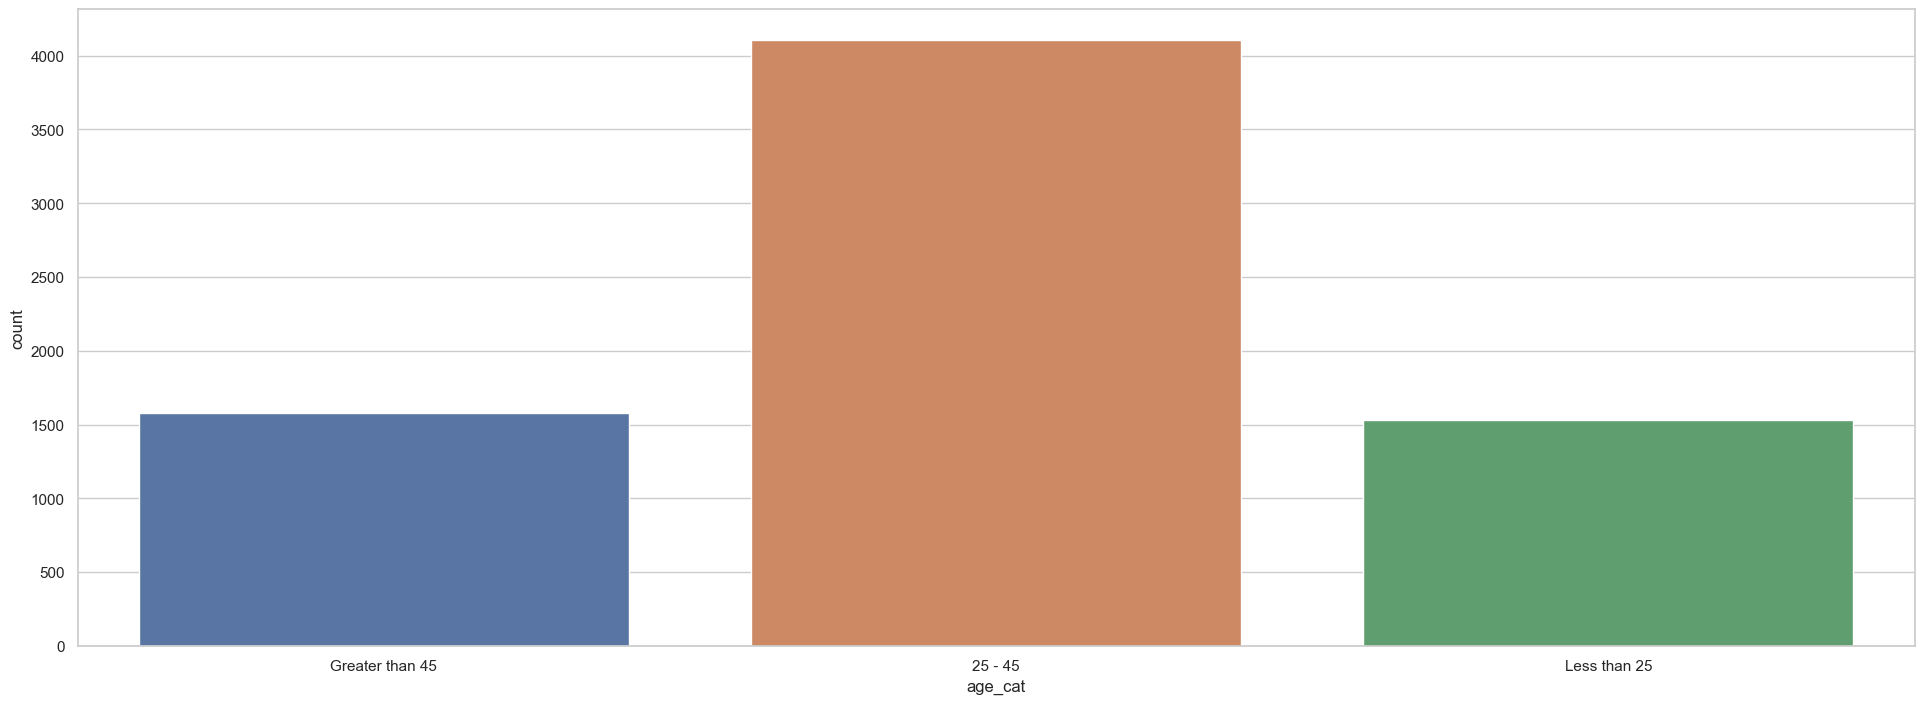

In [783]:
sns.countplot(x=df["age_cat"])

<AxesSubplot:xlabel='age', ylabel='Count'>

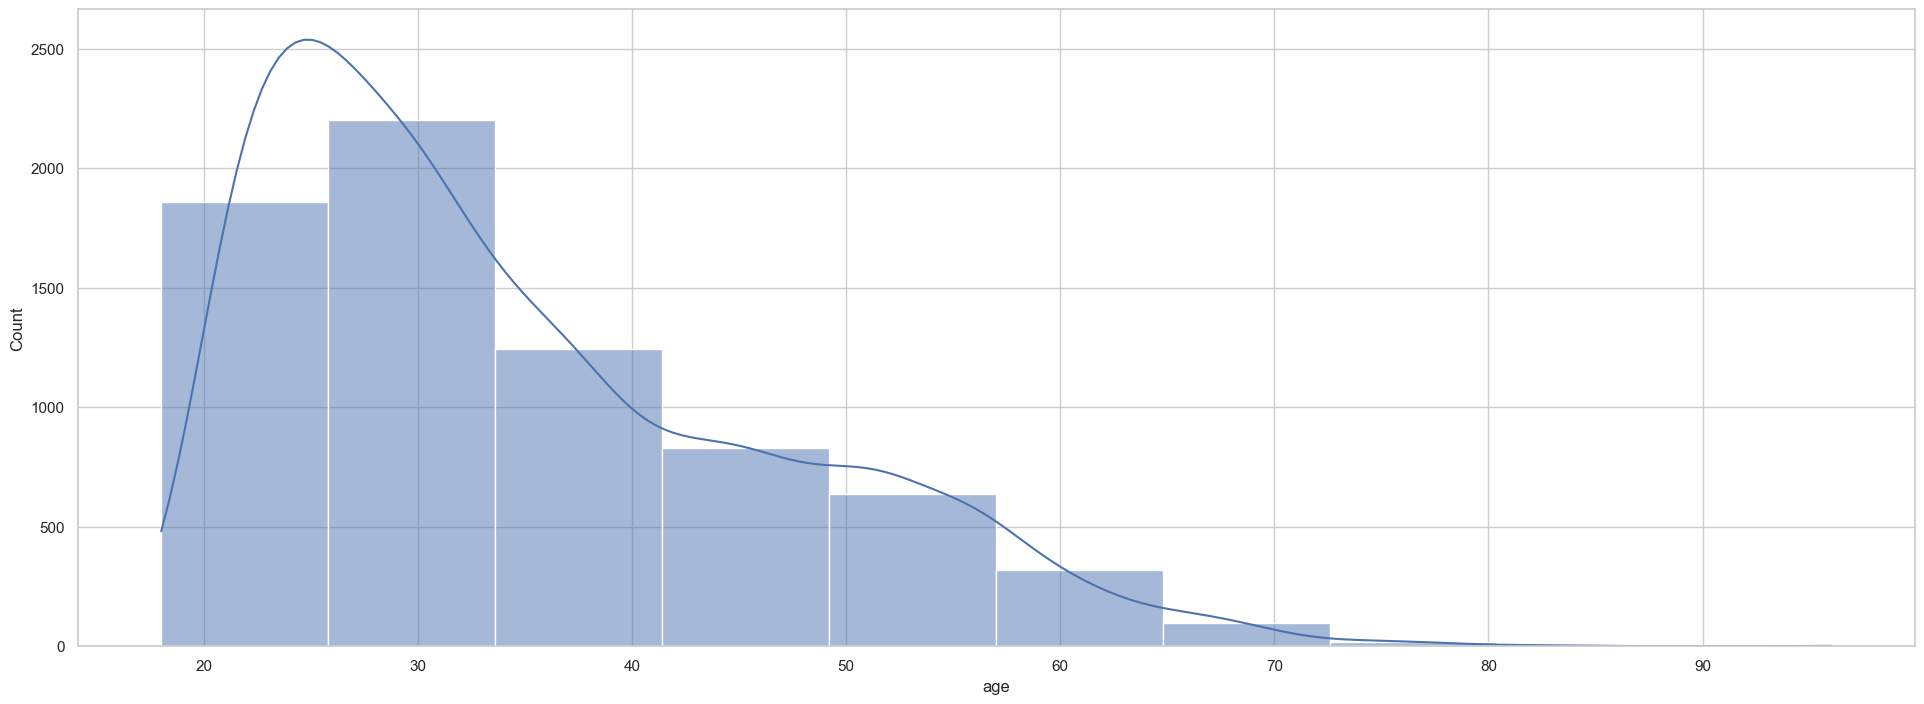

In [784]:
sns.histplot(data=df, x="age", kde=True, bins=10)

<AxesSubplot:xlabel='age'>

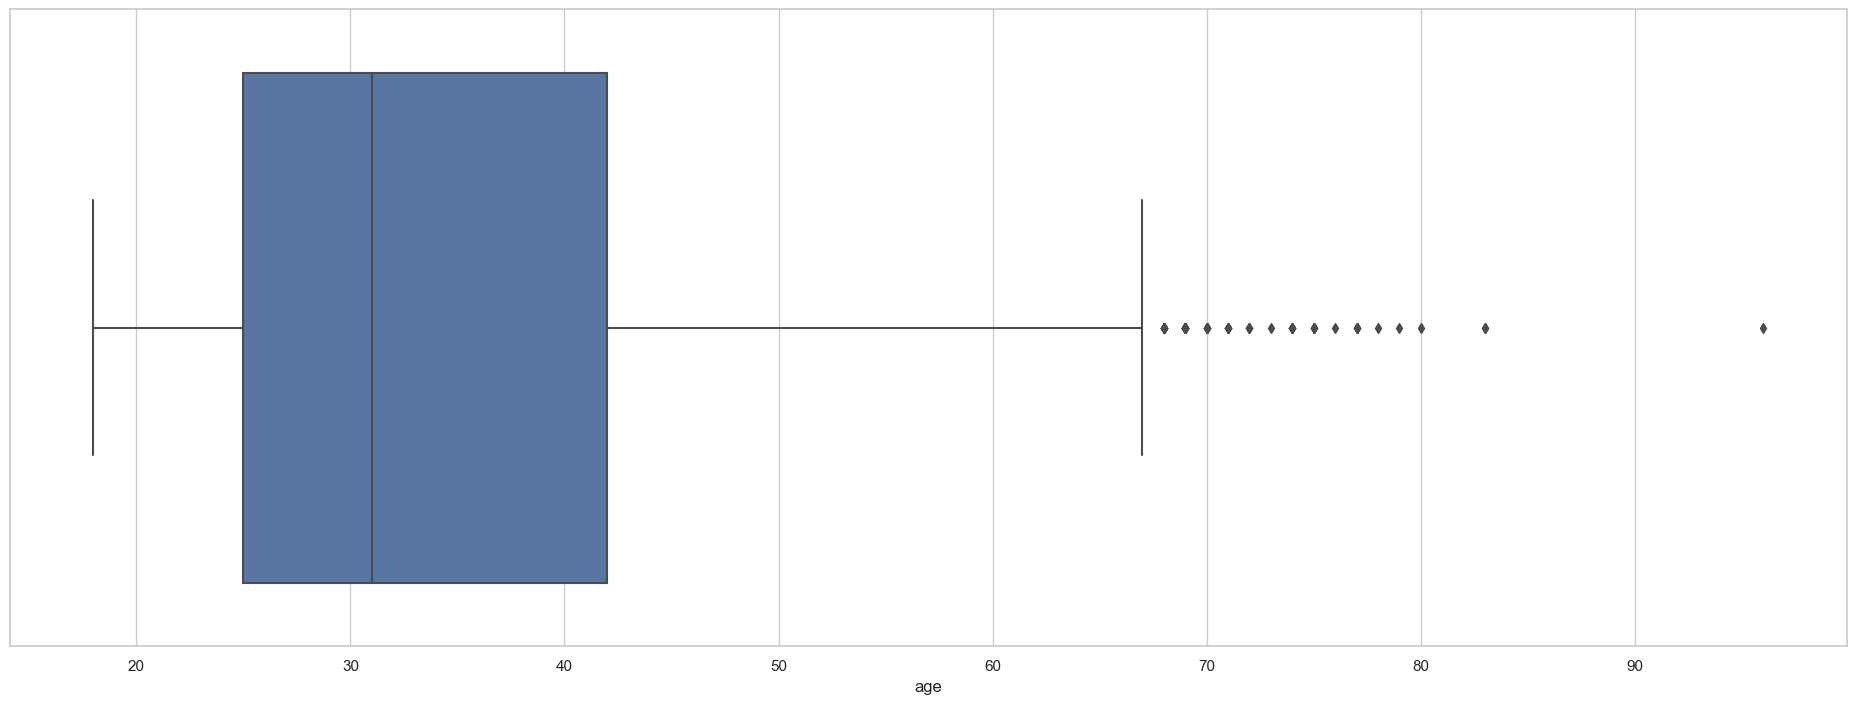

In [785]:
sns.boxplot(data=df, x="age")

<AxesSubplot:title={'center':'Jail Time After First Charge'}, xlabel='Days In Jail', ylabel='Age'>

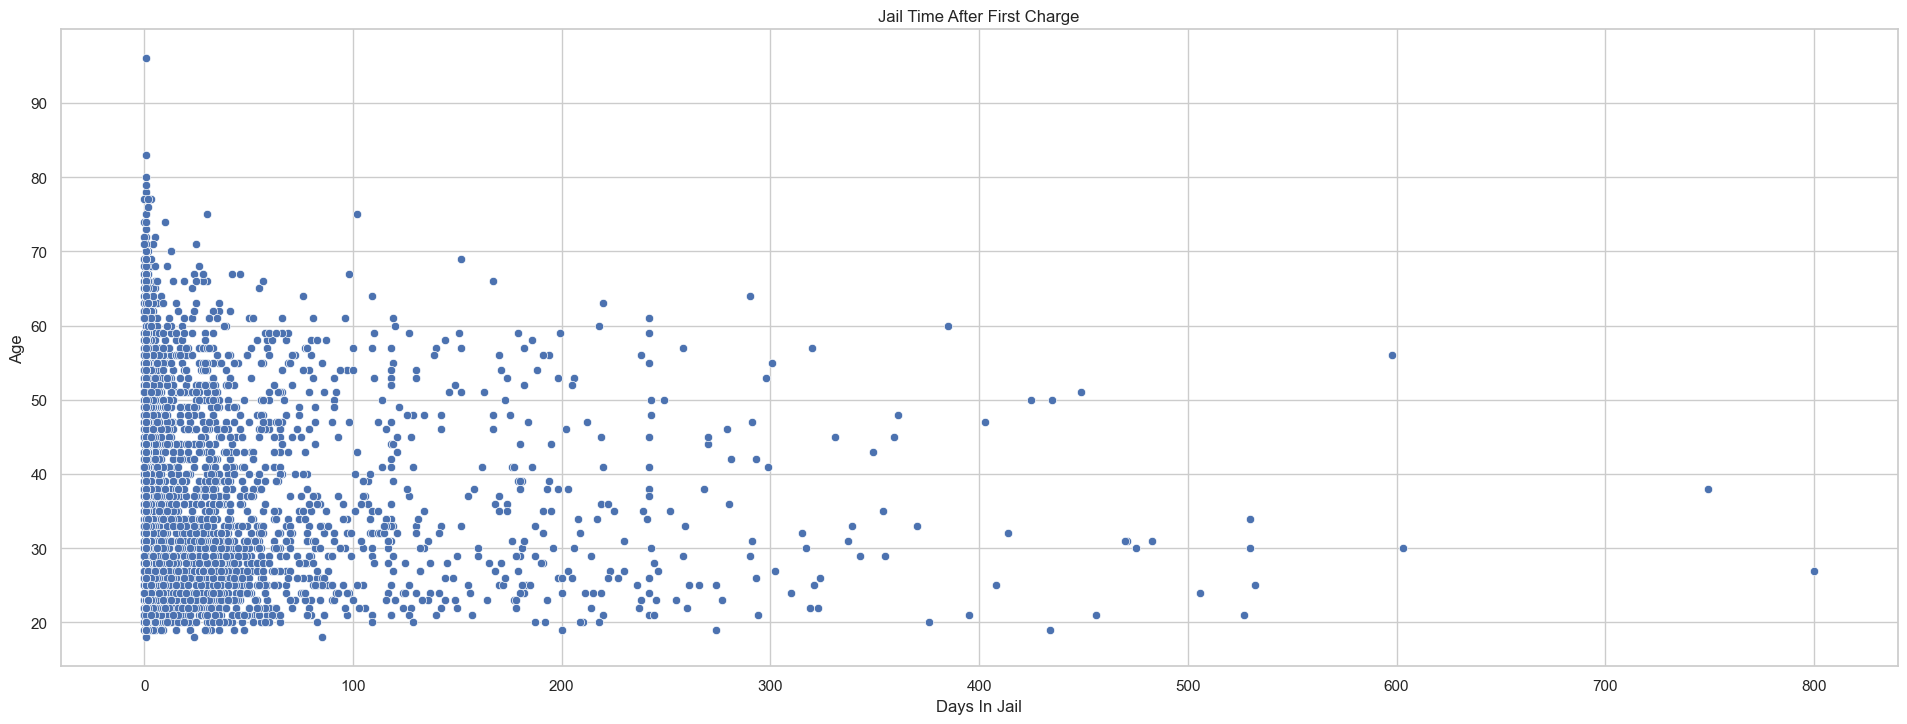

In [786]:
timeInJail = []
for i,p in df.iterrows():
    if(type(df.iloc[i][16]) != float):
        frontYear = int(df.iloc[i][16][:4])
        backYear = int(df.iloc[i][17][:4])
        frontMonth = int(df.iloc[i][16][5:7])
        backMonth = int(df.iloc[i][17][5:7])
        frontDay = int(df.iloc[i][16][8:10])
        backDay = int(df.iloc[i][17][8:10])

        frontDate = date(frontYear, frontMonth, frontDay)
        backDate = date(backYear, backMonth, backDay)
        daysInJail = backDate - frontDate

        timeInJail.append(daysInJail.days)
    else:
        timeInJail.append(np.nan)

df["timeInJail"] = timeInJail
      
g = sns.scatterplot(data=df, x="timeInJail", y="age")
g.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time After First Charge")
g

<AxesSubplot:title={'center':'Jail Time After First Charge'}, xlabel='Days In Jail', ylabel='Age'>

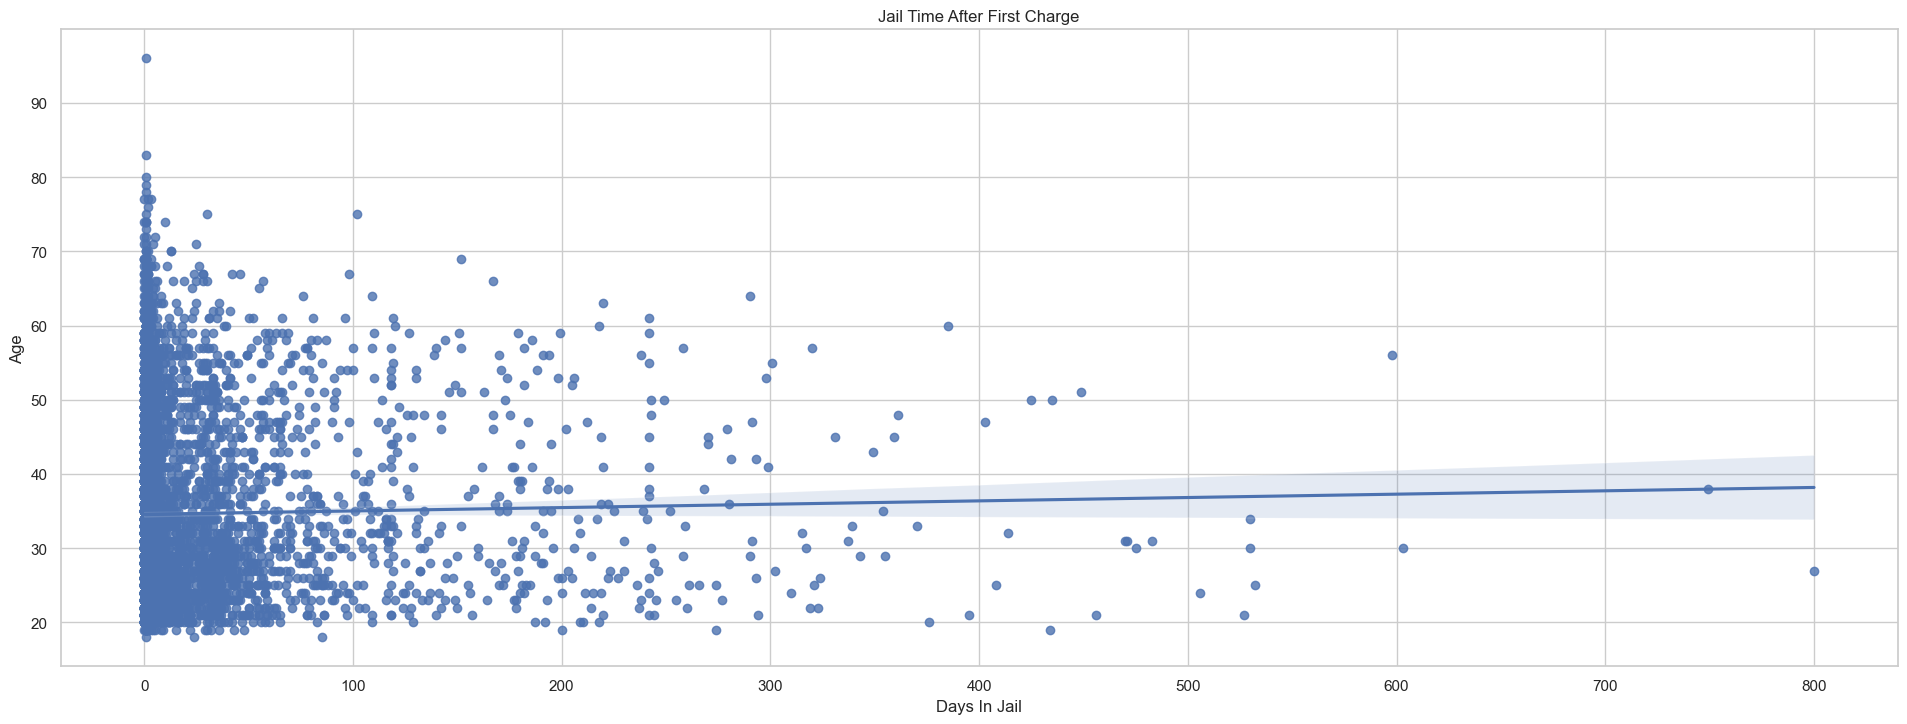

In [787]:
g = sns.regplot(data=df, x="timeInJail", y="age")
g.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time After First Charge")
g